In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

from sklearn import svm

In [13]:
# Columns: ['data', 'filenames', 'target_names', 'target', 'source', 'partition', 'doc_vector']
data = pd.read_pickle('data/newsgroup_vectors.pkl')

In [24]:
shuffled_idxs = data.index.values # Not actually shuffled yet
np.random.shuffle(shuffled_idxs) # Shuffles inplace

train_perc = .8
split_idx = round(len(shuffled_idxs) * .8)

train = data.iloc[0:split_idx].reset_index(drop=True)
text = data[split_idx:-1].reset_index(drop=True)

In [32]:
X = train.doc_vector.tolist()
y = train.target.tolist()

clf = svm.SVC(gamma='scale', decision_function_shape='ovo').fit(X, y)

clf.score(X, y) # Only reports score

0.6163693042382437

In [12]:
# Basic model with activation functions
f1 = pd.read_csv('model_train_results/basic_model-50.pkl').rename(columns={'Unnamed: 0':'epoch'})
f1['model'] = 'basic_model-50'
f2 = pd.read_csv('model_train_results/basic_model-75.pkl').rename(columns={'Unnamed: 0':'epoch'})
f2['model'] = 'basic_model-75'
f3 = pd.read_csv('model_train_results/basic_model-100.pkl').rename(columns={'Unnamed: 0':'epoch'})
f3['model'] = 'basic_model-100'


# Basic model without activation functions
f4 = pd.read_csv('model_train_results/basic_model-na-50.pkl').rename(columns={'Unnamed: 0':'epoch'})
f4['model'] = 'basic_model-na-50'
f5 = pd.read_csv('model_train_results/basic_model-na-75.pkl').rename(columns={'Unnamed: 0':'epoch'})
f5['model'] = 'basic_model-na-75'
f6 = pd.read_csv('model_train_results/basic_model-na-100.pkl').rename(columns={'Unnamed: 0':'epoch'})
f6['model'] = 'basic_model-na-100'

results = pd.concat([f1,f2,f3,f4,f5,f6], ignore_index=True).reset_index(drop=True)
results.head()

,epoch,mean_train_loss,mean_val_loss,train_acc,val_acc,runtime,model
0,0,3.202187,3.150115,0.052136,0.056514,4.653082,basic_model-50
1,1,3.186165,3.131214,0.051871,0.053064,4.650519,basic_model-50
2,2,3.177597,3.131214,0.051207,0.053064,5.345208,basic_model-50
3,3,3.177597,3.131214,0.051207,0.053064,4.776084,basic_model-50
4,4,3.177597,3.131214,0.051207,0.053064,4.556151,basic_model-50


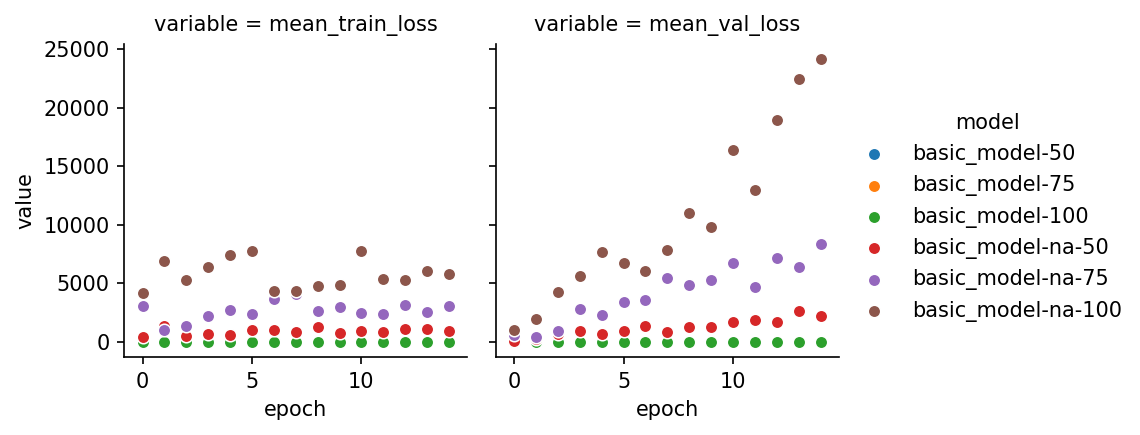

In [31]:
melt = pd.melt(results, id_vars = ['epoch', 'model'], value_vars = results.iloc[:,1:3])

g = sns.FacetGrid(melt, col="variable", hue='model')
g = g.map(sns.scatterplot, "epoch", 'value').add_legend()

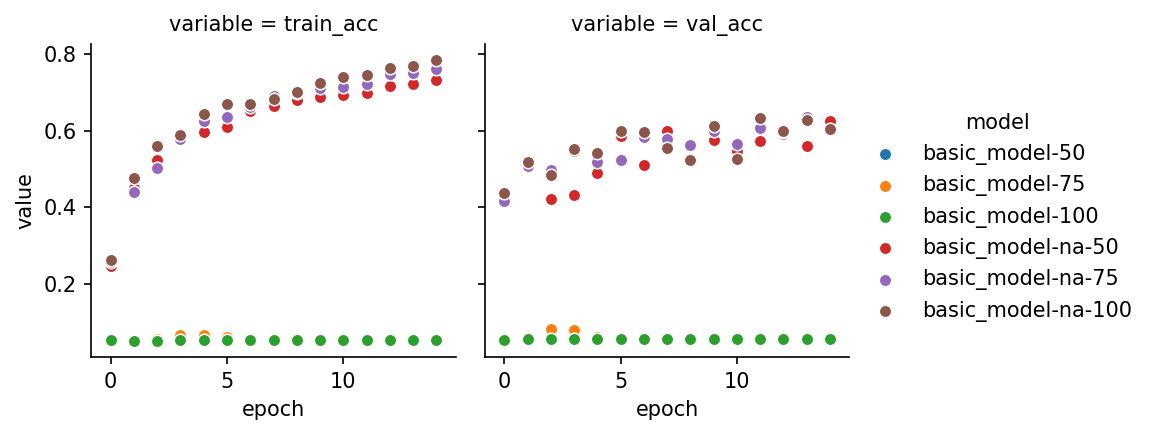

In [32]:
melt = pd.melt(results, id_vars = ['epoch', 'model'], value_vars = results.iloc[:,3:5])

g = sns.FacetGrid(melt, col="variable", hue='model')
g = g.map(sns.scatterplot, "epoch", 'value').add_legend()

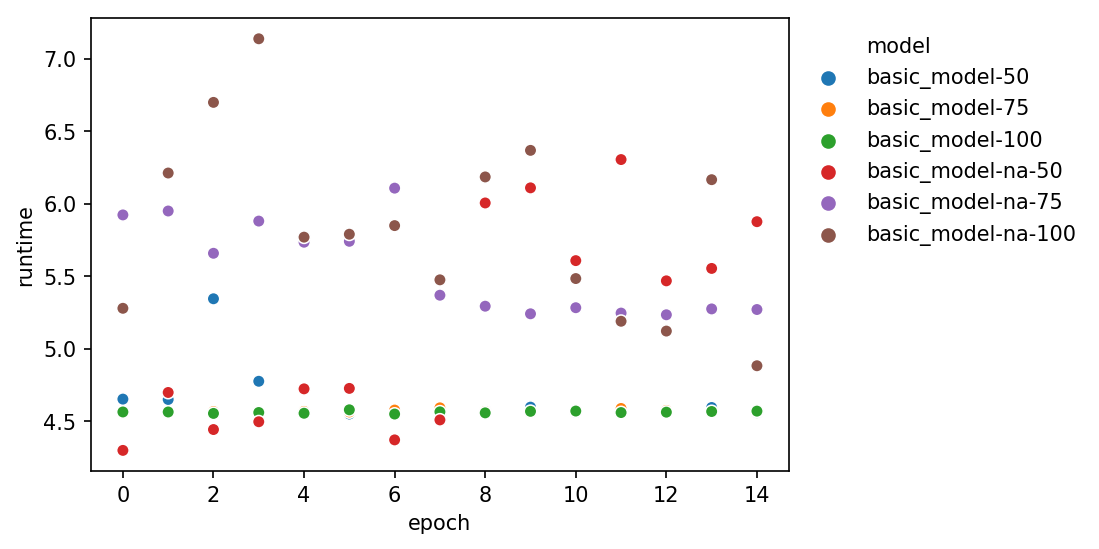

In [34]:
ax = sns.scatterplot('epoch', 'runtime', data=results, hue='model')
ax.legend(frameon = False, loc='upper left', bbox_to_anchor=(1, 1))